#### 3. Binary  classification  using  Deep  Neural  Networks Example:  Classify  movie  reviews  into  positive" reviews  and  "negative"  reviews, just based on the text content of the reviews. Use IMDB dataset

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D # type: ignore
from tensorflow.keras.datasets import imdb # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

In [13]:
max_words = 10000
max_len = 200

In [14]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [15]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [16]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64, 
    validation_data=(X_test, y_test)
)

Epoch 1/5
391/391 [==============================] - 11s 27ms/step - loss: 0.4566 - accuracy: 0.7820 - val_loss: 0.3050 - val_accuracy: 0.8678
Epoch 2/5
391/391 [==============================] - 11s 28ms/step - loss: 0.2312 - accuracy: 0.9068 - val_loss: 0.2988 - val_accuracy: 0.8715
Epoch 3/5
391/391 [==============================] - 10s 25ms/step - loss: 0.1427 - accuracy: 0.9506 - val_loss: 0.3232 - val_accuracy: 0.8696
Epoch 4/5
391/391 [==============================] - 10s 25ms/step - loss: 0.0751 - accuracy: 0.9784 - val_loss: 0.3760 - val_accuracy: 0.8639
Epoch 5/5
391/391 [==============================] - 10s 26ms/step - loss: 0.0305 - accuracy: 0.9941 - val_loss: 0.4341 - val_accuracy: 0.8617


In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss}")

782/782 [==============================] - 2s 2ms/step - loss: 0.4341 - accuracy: 0.8617
Test Accuracy: 86.17%
Test Loss: 0.43407779932022095


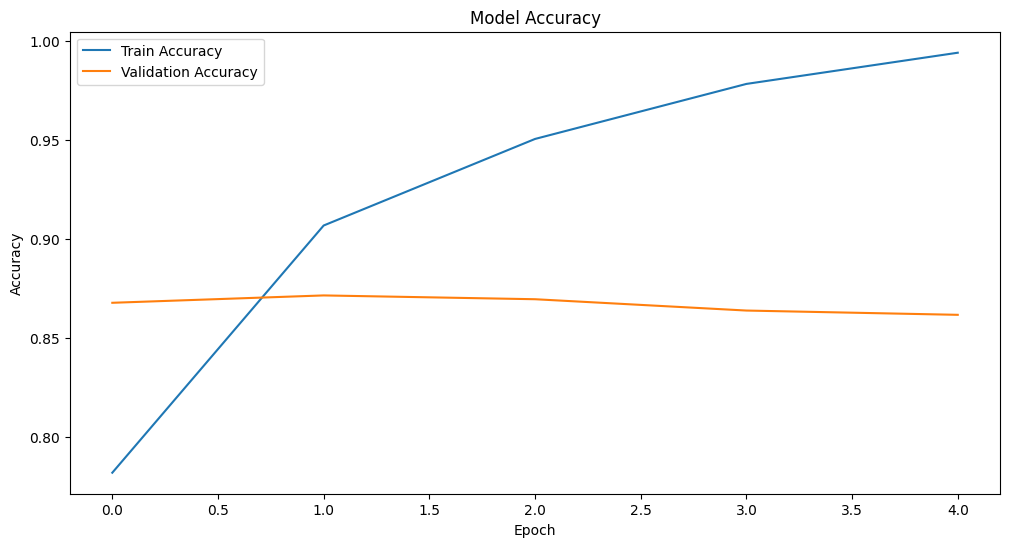

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#OPTIONAL
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
print("classification Report:\n")
print(classification_report(y_test, y_pred_binary))

782/782 [==============================] - 2s 2ms/step
classification Report:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

